In [48]:
import tensorflow
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import this using tensorflow and not just keras

In [49]:
img = image.load_img('/media/train/dog/dog.jpg', target_size=(256,256), color_mode='rgb', keep_aspect_ratio=True)

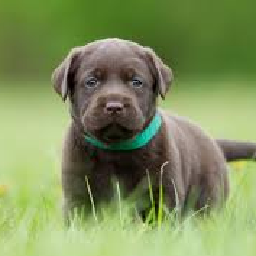

In [50]:
img

In [51]:
img = image.img_to_array(img)

In [52]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest' # constant, reflect
)

In [53]:
import numpy as np
image_batch = np.array([img])

In [ ]:
i = 0
for output in datagen.flow(image_batch, batch_size = 1, save_to_dir = "/media"):
    # Flow method is used when there is only one image
    i += 1
    if i == 5:
        break

## 📌 For Multi-image augumentation

In [54]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest' # constant, reflect
)

In [55]:
train_genetator = train_datagen.flow_from_directory(
    "/media",
    target_size = (256, 256),
    batch_size = 1,
    class_mode = 'binary'
)

Found 2 images belonging to 2 classes.


In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,715,169 (14.17 MB)

 Trainable params: 3,715,169 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.fit(
    train_genetator,
    steps_per_epoch = 2000 // 1,
    epochs = 25
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 102us/step - accuracy: 0.4997 - loss: 0.4267  
Epoch 2/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 91us/step - accuracy: 1.0000 - loss: 3.8898e-11   
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 1.0000 - loss: 9.7103e-06   
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 1.0000 - loss: 5.9371e-10   
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 1.0000 - loss: 5.0031e-12   
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 1.0000 - loss: 8.8998e-08   
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 75us/step - accuracy: 1.0000 - loss: 2.9266e-09   
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 1.0000 - loss: 1.0005e-06   
Epoch 9/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 1.0000 - loss: 1.5420e-04   
Epoch 10/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 1.0000 - loss: 6.2695e-15   
Epoch 11/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 62us/step - accuracy: 1.0000 - loss: 2.2783e-10   
Epoch 12/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 65u